## Esame di Metodi Numerici 6 Maggio 2024 

## Esercizo 1
- Si consideri il sistema lineare Ax=b, con A matrice e b termine noto memorizzati nel file ``'test_14_09_2023.mat'``.  Risolvere il sistema confrontando almeno due tra i metodi  visti  per utilizzare per risolvere il sistema lineare con tale matrice dei coefficienti. Confrontare i risultati dei vari metodi, e giustificare i loro comportamento utilizzando i risultati teorici visti a lezione.
- 
Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('test_06_05_2024.mat')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``


                                       [10 punti]
                                         


In [46]:
from scipy.io import loadmat
import numpy as np
from SolveTriangular import Lsolve, Usolve
import matplotlib.pyplot as plt

In [36]:
dati = loadmat('test_06_05_2024.mat')
A=dati["A"] 
A=A.astype(float)
b=dati["b"]
b=b.astype(float)

print("A:", A)
# controlliamo le caratteristiche di A per determinare quali metodi di risoluzione sono applicabili
def diagonale_dominante(A):
    absA = np.abs(A)
    return np.all(2*np.diag(absA)>np.sum(absA, axis=1)) # |Aii| > sum_i!=j|Aij| => 2|Aii| > sum_j|Aij|

print("Dimensioni di A:", A.shape) # 400x400, è una matrice quadrata e grande
print(f"Densità di A: {(np.count_nonzero(A)/np.prod(A.shape))*100}%") # < 33%, è una matrice sparsa
print("A è a diagonale strettamente dominante?", diagonale_dominante(A)) # non è a diagonale strettamente dominante
print("A è simmetrica?", np.all(A.T==A)) # è simmetrica
print("A è definita positiva?", np.linalg.det(A) != 0) # è definita positiva

A: [[7. 2. 0. ... 0. 0. 0.]
 [2. 7. 2. ... 0. 0. 0.]
 [0. 2. 7. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 7. 2. 0.]
 [0. 0. 0. ... 2. 7. 2.]
 [0. 0. 0. ... 0. 2. 7.]]
Dimensioni di A: (400, 400)
Densità di A: 1.2449999999999999%
A è a diagonale strettamente dominante? False
A è simmetrica? True
A è definita positiva? True


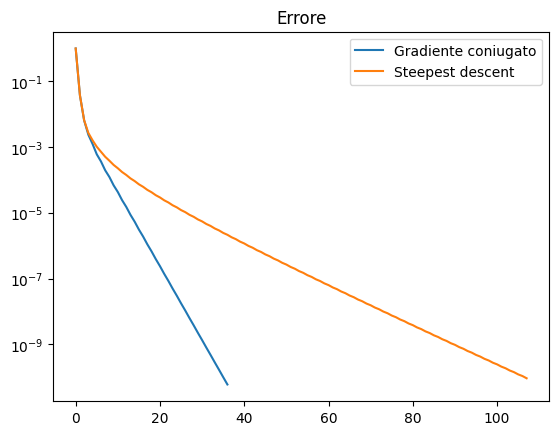

In [50]:
# In base alle caratteristiche di A, i metodi utilizzabili sono:
# - Gauss-Seidel
# - Gauss-Seidel SOR
# - Steepest-descent (Metodo del gradiente)
# - Gradiente coniugato

# Controllo il raggio spettrale della matrice 

# Scelgo Gradiente coniugato e Steepest-descent
def conjugate_gradient(A,b,x0,itmax,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
   # inizializzare le variabili necessarie
    x = x0
    
    r = A@x-b
    p = -r 
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x0.copy())
    vet_r=[]
    vet_r.append(errore)
# utilizzare il metodo del gradiente coniugato per calcolare la soluzione
    while it < itmax and errore > tol:
        it=it+1
        Ap=A@p
        alpha = -(r.T@p)/(p.T@Ap) 
        x = x + alpha*p
        vec_sol.append(x.copy())
        rtr_old=r.T@r
        r= r + alpha*Ap
        gamma=r.T@r/rtr_old
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -r + gamma*p # discesa lungo il gradiente coniugato sul piano formato da -r e p
   
    iterates_array = np.vstack([arr.T for arr in vec_sol])
    return x,vet_r,iterates_array,it

def steepestdescent(A,b,x0,itmax,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
    # inizializzare le variabili necessarie
    x = x0
    
    r = A@x-b
    p = -r 
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x.copy())
    vet_r=[]
    vet_r.append(errore)
    # utilizzare il metodo del gradiente per trovare la soluzione
    while it < itmax and errore > tol: 
        it=it+1
        Ap=A@p
       
        alpha = -(r.T@p)/(p.T@Ap)
                
        x = x + alpha*p
        
         
        vec_sol.append(x.copy())
        r=r + alpha*Ap
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p =-r # direzione opposta al gradiente per massima discesa
        
    iterates_array = np.vstack([arr.T for arr in vec_sol])
    return x,vet_r,iterates_array,it

n = A.shape[0]
x0 = np.zeros((n, 1)) # iterato iniziale per entrambi i metodi
itmax = 1000
tol = 1e-10
x_cg, err_cg, itv_cg, it_cg = conjugate_gradient(A, b, x0, itmax, tol)
x_sd, err_sd, itv_sd, it_sd = steepestdescent(A, b, x0, itmax, tol)

plt.title("Errore")
plt.yscale("log")
plt.plot(range(it_cg+1), err_cg, label="Gradiente coniugato")
plt.plot(range(it_sd+1), err_sd, label="Steepest descent")
plt.legend()
plt.show()

# il metodo steepest-descent segue sempre la direzione opposta al gradiente, che essendo perpendicolare alle curve di livello, porta ad una discesa a "zig-zag" molto inefficiente.
# il metodo del gradiente coniugato segue invece, come dice il nome, il gradiente coniugato sul piano formato da -r e p, che geometricamente rappresenta un movimento verso il centro.

- Data la matrice 
$$A=\left[
\begin{array}{cccc}
1 & 2 & 3 & 4\\
2 & -4 & 6 & 8\\
-1 & -2 & -3 & -1\\
5 & 7 & 0 & 1
\end{array}
\right ],$$
Richiamare le ipotesi sotto cui esiste la fattorizzazione di Gauss senza pivoting e scrivere un codice per  verificarle.

                                                [2 punti]

In [51]:
def controllo_requisiti_lu(A):
    # La matrice deve essere quadrata
    print("Dimensioni di A:", A.shape)
    m, n = A.shape
    if m != n:
        return False

    # ogni sottomatrice di testa è non singolare
    for i in range(1, n+1):
        Ai = A[:i, :i]
        detAi = np.linalg.det(Ai)
        print(f"Matrice di testa A{i}: {Ai}")
        print(f"Determinante matrice di testa A{i}: {detAi}")
        if detAi == 0:
            return False
    return True

A = np.array([
    [1, 2, 3, 4],
    [2, -4, 6, 8],
    [-1, -2, -3, -1],
    [5, 7, 0, 1],
])

if controllo_requisiti_lu(A):
    PT, L, U = np.linalg.lu(A)
    P=PT.T.copy()
    print("P:", P)
    print("L:", L)
    print("U:", U)
    print("L@U:", L@U)
else:
    print("La matrice non soddisfa i requisiti necessari per la fattorizzazione di Gauss")

Dimensioni di A: (4, 4)
Matrice di testa A1: [[1]]
Determinante matrice di testa A1: 1.0
Matrice di testa A2: [[ 1  2]
 [ 2 -4]]
Determinante matrice di testa A2: -7.999999999999998
Matrice di testa A3: [[ 1  2  3]
 [ 2 -4  6]
 [-1 -2 -3]]
Determinante matrice di testa A3: 0.0
La matrice non soddisfa i requisiti necessari per la fattorizzazione di Gauss


## Esercizio 2
Scrivere uno script che calcoli il polinomio interpolante un insieme di punti $P_i =(x_i, y_i)$ $i = 0, ..., n $ nella forma di Lagrange, $n=5,10,15,18$

- nodi $x_i$, punti equidistanti in un intervallo $[a, b]$,
- nodi $x_i$, zeri dei polinomi di Chebyshev nell'intervallo $[a, b]$, ossia
$$
x_i = \frac{(a + b)}{2}+\frac{(b-a)}{2} \, \cos \left(
\frac{(2i+1)\pi}{2(n + 1)}
\right), \quad  i =0, ..., n 
$$
 
  e $y_i = f(x_i)$ ottenuti dalla valutazione nei punti $x_i$ della funzione test   $f: \ [a, b] \rightarrow {\mathbb R}$. 
  - $f(x) = 1/(1+25*x^2)$,  $ \quad x \in [-1, 1]$ (funzione di Runge).
  
                                          [6] punti

- Calcolare l'errore di interpolazione $r(x) =  f(x)-pe(x) $,
tra la funzione test $f(x)$ e il polinomio di interpolazione $pe(x)$ calcolato a partire da nodi equdisitanti.
                                        [1] punto
                                        
Visualizzare il grafico di $f(x)$ e $pe(x)$, ed il grafico di $|r(x)|$ per ogni valore $n=5,10,15,18$ 

                                        [1] punto
                                        
Calcolare l'errore di interpolazione $r(x) =  f(x)-pc(x) $,
tra la funzione test $f(x)$ e il polinomio di interpolazione $p(x)$ calcolato a partire da nodi di Chebichev.

                                      [1] punto
                                            
Visualizzare il grafico di $f(x)$ e $pc(x)$, ed il grafico di $|r(x)|$. 

                                       [1] punto

Cosa si osserva? Cosa accade all'aumentare del grado $n$ di $p(x)$? Scrivere la formula dell'errore che si compie quando al posto della funzione che ha generato i dati si considera il polinomio interpolatore di grado n e commentarla.
                                         
                                         [3 punti]

In [53]:
import numpy as np
import matplotlib.pyplot as plt

In [58]:
def plagr(xnodi,j):
    
    xzeri=np.zeros_like(xnodi)
    n=xnodi.size
    if j==0:
       xzeri=xnodi[1:n]
    else:
       xzeri=np.append(xnodi[:j], xnodi[j+1:n])
    
    num= np.poly(xzeri)
    den= np.polyval(num, xnodi[j])
    
    p= num/den
    
    return p



def InterpL(x, y, xx):
     
     n=x.size
     m=xx.size 
     L=np.zeros((m,n))
     for j in range(n):
        p=plagr(x, j) 
        L[:,j]=np.polyval(p, xx) 
    
    
     return L@y

def Chebyshev(n, a, b):
    i = np.arange(0, n+1)
    return ((a+b)/2)+((b-a)/2)*np.cos(((2*i+1)*np.pi)/(2*(n+1)))

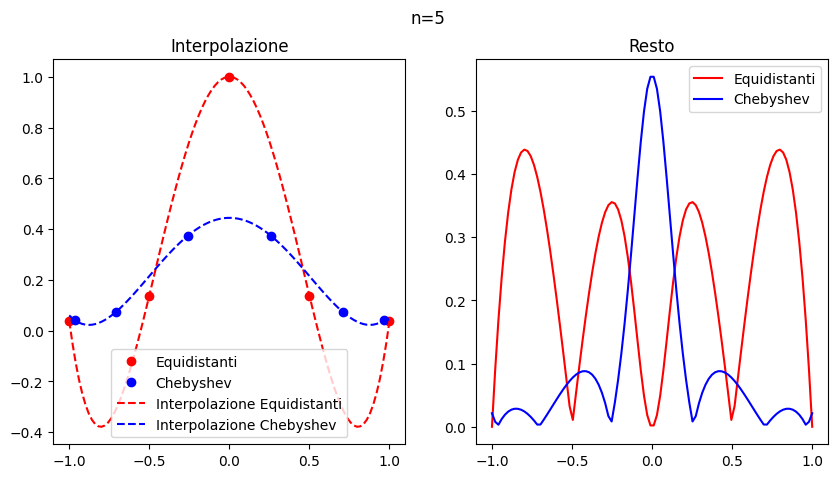

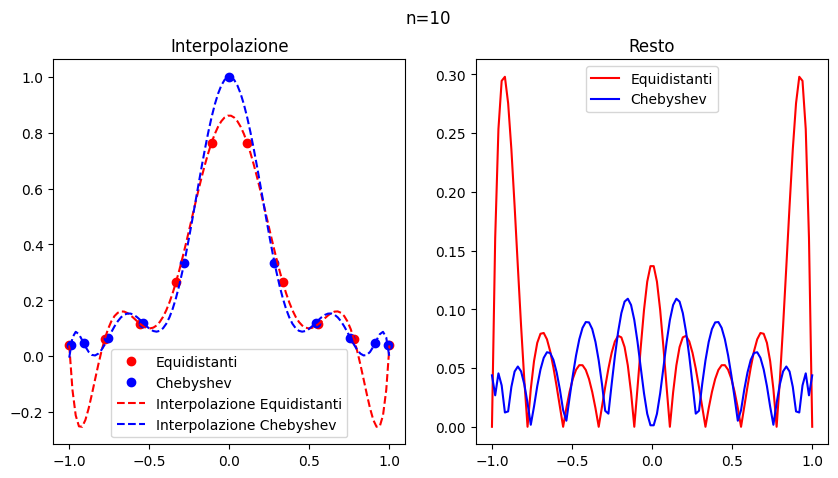

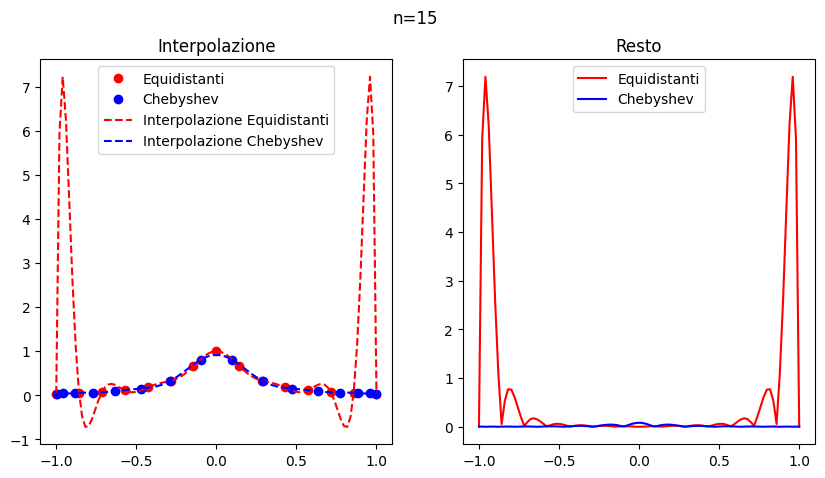

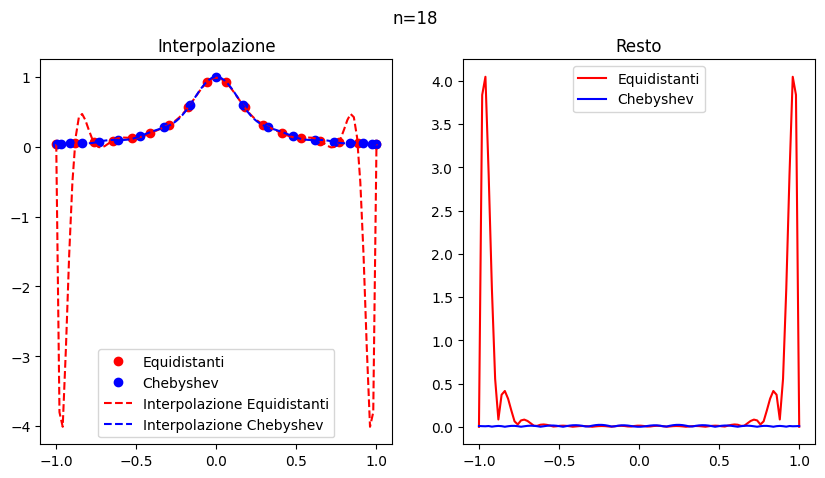

In [84]:
valori_n = [5, 10, 15, 18]
a, b = -1, 1

f = lambda x: 1/(1 + 25*x**2)

for n in valori_n:
    x_eq = np.linspace(a, b, n)
    x_ch = Chebyshev(n, a, b)
    y_eq = f(x_eq)
    y_ch = f(x_ch)
    xx = np.linspace(a, b, 100)
    yy_eq = InterpL(x_eq, y_eq, xx)
    yy_ch = InterpL(x_ch, y_ch, xx)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(f"n={n}")
    
    ax1.set_title("Interpolazione")
    ax1.plot(x_eq, y_eq, "ro", label="Equidistanti")
    ax1.plot(x_ch, y_ch, "bo", label="Chebyshev")
    ax1.plot(xx, yy_eq, "r--", label="Interpolazione Equidistanti")
    ax1.plot(xx, yy_ch, "b--", label="Interpolazione Chebyshev")
    ax1.legend()
    
    r_eq = f(xx) - yy_eq
    r_ch = f(xx) - yy_ch
    
    ax2.set_title("Resto")
    ax2.plot(xx, np.abs(r_eq), "r", label="Equidistanti")
    ax2.plot(xx, np.abs(r_ch), "b", label="Chebyshev")
    ax2.legend()
    
    plt.show()

# Al crescere di n, si può notare come usando gli zeri lineari l'interpolazione non converge (oscillazioni ai bordi), mentre tramite Chebyshev si

**Domanda AI**

- Descrivere gli elementi caratterizzanti di un MultiLayer Perceptron (MLP).( Com'è fatto un neurone artificiale, a caso servono le funzioni di attivazione, come sono organizzati i neuroni. Varie tipologie di reti MLP)  ed accennare in cosa consiste la fase di forward propagation e la fase di backward propagation. **Punti: 1**

- Ottimizzazione della loss function per il training di una rete neurale per il task di regressione: Metodo di discesa del gradiente, metodo stocastico del gradiente, metodo del gradiente minibatch.  **Punti 1**  
 - Non convessità della loss-function - come non rimanere bloccati in un monimo locale? Metodo del gradiente con momentum. **Punti 2**
- Learning rate scheduling: step decay, decadimento esponenziale, decadimento dipendente dal tempo. **Punti 1**
 - Learning rate adattivo: Adagrad, RMSProp, Adadelta, Adam. **Punti 2**
 
 **Totale:  7**

* Un neurone artificiale è ispirato al funzionamento di un neurone reale. Infatti, il neurone artificiale accetta un tot di dati in input da altri neuroni (dentriti) ciascuno con il proprio peso, poi ha un nucleo in cui gli input vengono elaborati attraverso una funzione di attivazione (soma) che, se il risultato dell'elaborazione degli input supera una certa soglia, attiva il neurone innescando la comunicazione con i neuroni del layer successivo (sinapsi).
In una MLP, ci sono 3 tipi di layer di neuroni: input, hidden e output. Gli hidden layer sono così chiamati perché "nascondono" la parte di elaborazione interna, lasciando che, dall'esterno, ci si possa interfacciare solo con i lyaer di input e di output. Nelle MLP, i layer sono fortemente connessi, ovvero ogni neurone è connesso con ogni altro neurone del solo layer successivo.
Nella fase di forward propagation, i dati vengono elaborati e trasmessi da un layer a quello successivo, fino a raggiungere l'output layer.
Nella backward propagation, i dati elaborati possono essere trasmessi anche tra neuroni dello stesso layer, o anche all'indietro (layer precedenti).

* Nel metodo di discesa del gradiente di tipo "batch", i pesi dei neuroni vengono aggiornati considerando tutte le osservazioni (o i campioni) del training set ogni volta (ovvero, vengono forniti in input tutti i dati disponibili insieme, il modello di AI li elabora, aggiorna tutti i pesi, poi si riparte da capo).
Nella variante di tipo "stocastica", viene fornita una sola osservazione alla volta.
Nella variante di tipo "mini-batch", le osservazioni vengono fornite in piccoli gruppi alla volta (è un compresso tra le prime due versioni).

* La loss function non è convessa dal momento in cui vengono introdotti diversi layer di neuroni, che rendono la funzione e il processo di apprendimento non lineare. Questo dà luogo alla formazione di minimi LOCALI nella funzione. Durante il processo di discesa del gradiente, siccome in prossimità di un minimo locale il valore della derivata si può ridurre fino ad annullarsi, può accadare di raggiungere un minimo locale e rimanere "bloccati", impossibilitati ad andare avanti nella funzione. La soluzione che si adotta è quella del "Momentum", ispirato proprio al concetto di "momento" in fisica: viene modificata la funzione di aggiornamento introducendo una logica che aumenta la "velocità" della discesa prima di raggiungere un minimo locale (controllando l'inclinazione del gradiente), in modo che, una volta raggiunto il minimo, si abbia abbastanza "slancio" per proseguire.

* Queste sono tutte formule usate per modificare il learning rate (che è un iperparametro pre-impostato del modello) in maniera adattiva durante i vari cicli di apprendimento.
Nello Step Decay, il learning rate viene abbassato di un certo valore costante (parametro) ogni tot epoche (altro parametro).
Nel Decadimento Esponenziale, il learning rate di abbassa seguendo una curva esponziale ("e" elevato alla meno "parametro").
Nel Time Decay, il learning rate viene abbassato in funzione del numero di iterazioni già compiute.


* Queste sono tutte tecniche per modificare il learning rate per ogni peso, anziché solo a livello globale rispetto alla rete.
Adagrad (Adaptive Gradient) effettua aggiornamenti più grandi per dati meno frequenti e aggiornamenti più piccoli per dati più frequenti.
RMSProp (Root Mean Squared Propagation) migliora Adagrad introducendo, al posto della media della somma dei quadrati dei gradienti, una media ponderata esponenziale dei quadrati dei gradienti.
Adadelta è una versione modificata di RMSProp che non richiede più la presenza del parametro di learning rate nella formula di aggiornamento, ma usa le informazioni sui gradienti passati per calcolare di volta in volta un learning rate più adatto.
Adam combina il funzionamento di RMSProp e dell'algoritmo del Momentum, usando una media pesata esponenziale dei gradienti per calcolare solitamente fino a due livelli di "momento"